In [1]:
import numpy as np
import pandas as pd
from pygam import LinearGAM, s


In [2]:
#extract model with only temperature, radiation, soil mositure and VPD and GPP from previous time step
#get GPP of the previous time step
data['GPP_t-1'] = data['GPP'].shift(1)
data_gam = np.log(data + 1e-6).dropna()

mean = data_gam.mean()

data_gam = (data_gam - mean)

X_gam = data_gam[['air_temperature', 'Rn', 'SMs', 'VPD','GPP_t-1']]
y_gam = data_gam['GPP']#.iloc[:,0]

X_train_gam, X_test_gam, y_train_gam, y_test_gam = train_test_split(X_gam, y_gam, test_size=0.3, random_state=42)

In [3]:
# Assuming your data is in a DataFrame named 'data'
# X_train_gam: feature matrix, y_train_gam: target variable
y_train_gam_= y_train_gam.values  # or your specific target variable
X_train_gam_ = X_train_gam.values  # or your

# Create the GAM model. Grid search is used to find the optimal number of splines
gam = LinearGAM().gridsearch(X_train_gam_, y_train_gam_)

# Fit the model
gam.fit(X_train_gam_, y_train_gam_)

# To see the summary of the model
print(gam.summary())


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

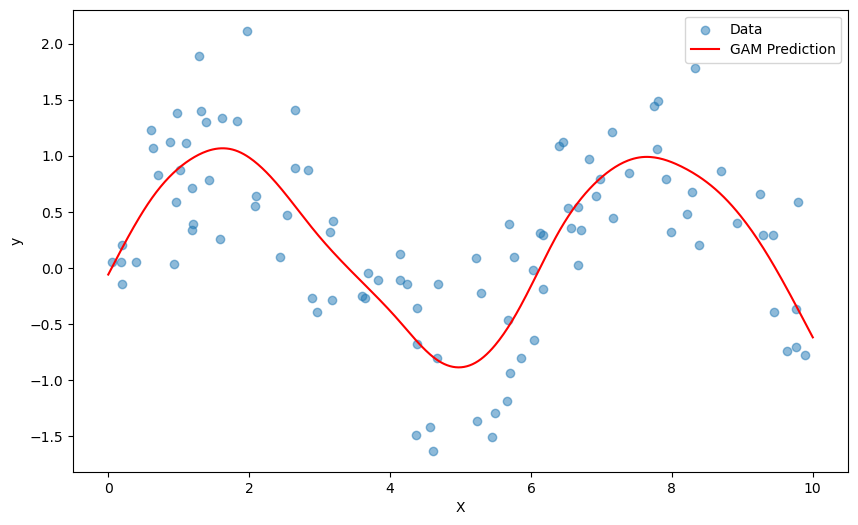

In [4]:
y_pred = gam.predict(X_test_gam)

# Calculate the performance metrics
mse = mean_squared_error(y_test_gam, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_gam, y_pred)

In [ ]:
fig, ax = plt.subplots(figsize=(6.7, 5.7))
ax.scatter(y_test_gam, y_pred, c=z, s=15, cmap='jet', alpha=1.0)
ax.plot([y_test_gam.min(), y_test_gam.max()], [y_test_gam.min(), y_test_gam.max()], 'm-', lw=1.5)
# ax.set_xlim(.00015, y_pred.max())
# ax.set_ylim(.00015, y_pred.max())

ax.set_xlabel('Observed data')
ax.set_ylabel('Random Forest')
plt.show()

In [ ]:
# Create subplots
nrows=2
ncols=len(gam.terms)//nrows
fig, ax = plt.subplots(figsize=(10, 4), nrows=nrows, ncols=ncols)
ax = ax.flatten()  # Flatten the array of axes for easy indexing

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    # Generate the grid for the current term
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    # Plot partial dependence on the corresponding axis
    ax[i].plot(XX[:, term.feature], pdep, label='Partial Dependence')
    ax[i].plot(XX[:, term.feature], confi, c='r', ls='--', label='Confidence Interval')
    ax[i].set_title(repr(term))
    ax[i].set_xlabel(term.feature)  # Set x-axis label based on the term feature
    ax[i].set_ylabel('Partial Dependence')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.2495
Link Function:                     IdentityLink Log Likelihood:                                   -952.605
Number of Samples:                          133 AIC:                                              1929.709
                                                AICc:                                            1932.4197
                                                GCV:                                              605.6546
                                                Scale:                                            514.2013
                                                Pseudo R-Squared:                                   0.7969
Feature Function                  Lam

C:\Users\kart\AppData\Local\Temp\ipykernel_23272\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
